In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path
from os.path import join
from ast import literal_eval as make_tuple
from scipy.stats import zscore
import numpy as np
from matplotlib.legend import _get_legend_handles_labels

In [32]:
def cp_model(model):
    filepath = Path("/home/users/train014/Repositories/group_5/data/cap_factor_input_per_carrier_all_periods_{}.csv".format(model))
    model_data = pd.read_csv(filepath)
    model_data = model_data.rename(columns={"Unnamed: 0": "carrier"}).set_index("carrier")
    model_data = pd.DataFrame(model_data.stack()).rename(columns={0:"capacity_factor"})
    return model_data
def storage_model(model):
    filepath = Path("/home/users/train014/Repositories/group_5/data/storage_capacity_per_carrier_all_periods_model{}.csv".format(model))
    model_data = pd.read_csv(filepath)
    model_data = model_data.rename(columns={"Unnamed: 0": "storage"}).set_index("storage")
    model_data = pd.DataFrame(model_data.stack()).rename(columns={0:"str_capacity"})
    return model_data

In [44]:
cp_CNRM = cp_model("CNRM").reset_index().rename(columns={"level_1":"period"})
cp_CNRM["model"] = "CNRM"
cp_ICHEC= cp_model("ICHEC").reset_index().rename(columns={"level_1":"period"})
cp_ICHEC["model"] = "ICHEC"
cp_MPI= cp_model("MPI").reset_index().rename(columns={"level_1":"period"})
cp_MPI["model"] = "MPI"
cp_all = pd.concat([cp_CNRM, cp_ICHEC, cp_MPI],
                            ignore_index = True)
cp_all = cp_all.groupby(["model","carrier","period"]).mean()

In [15]:
model = "CNRM"
filepath = Path("/home/users/train014/Repositories/group_5/data/storage_capacity_per_carrier_all_periods_model{}.csv".format(model))
model_data = pd.read_csv(filepath)
model_data = model_data.rename(columns={"Unnamed: 0": "storage"}).set_index("storage")
model_data = pd.DataFrame(model_data.stack()).rename(columns={0:"str_capacity"})

In [50]:
stg_CNRM = storage_model("CNRM").reset_index().rename(columns={"level_1":"period"})
stg_CNRM["model"] = "CNRM"
stg_ICHEC = storage_model("ICHEC").reset_index().rename(columns={"level_1":"period"})
stg_ICHEC["model"] = "ICHEC"
stg_MPI = storage_model("MPI").reset_index().rename(columns={"level_1":"period"})
stg_MPI["model"] = "MPI"

stg_all = pd.concat([stg_CNRM, stg_ICHEC, stg_MPI],
                            ignore_index = True)
stg_all = stg_all.groupby(["model","storage","period"]).mean()

In [55]:
pairings = stg_all.join(cp_all, how="outer")

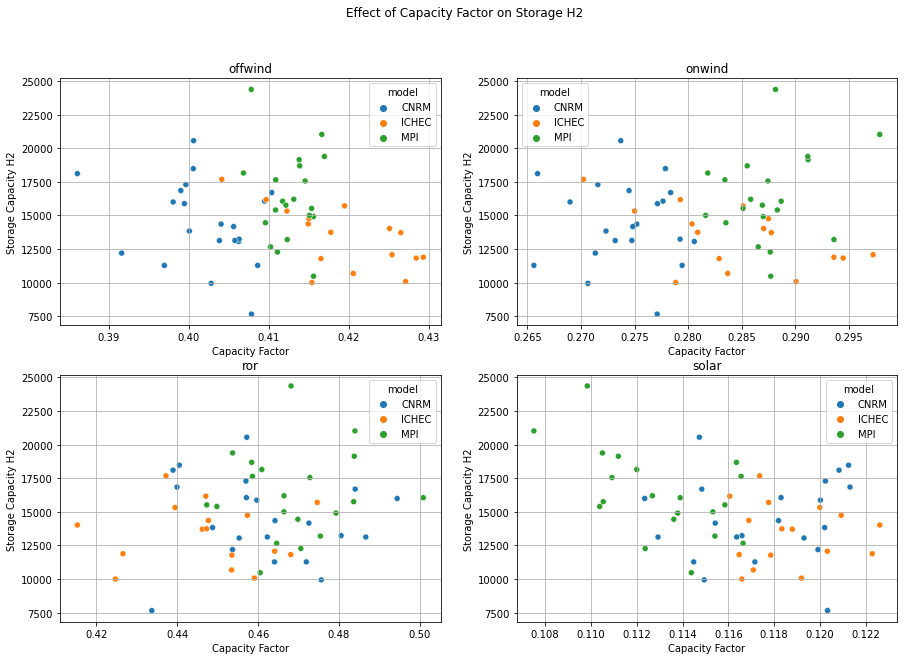

In [77]:
h2_pairings = pairings.loc[:,:,"H2",:]
fig, axes = plt.subplots(2,2, figsize=(15,10))
fig.suptitle("Effect of Capacity Factor on Storage H2")
axes_pointer = axes.flatten()
for i, carrier in enumerate(['offwind', 'onwind', 'ror', 'solar']):
    sns.scatterplot(data=h2_pairings.loc[:,:,carrier], 
                    x="capacity_factor", y="str_capacity", hue="model",
                    ax = axes_pointer[i], legend = True)
    axes_pointer[i].set_title(carrier)
    axes_pointer[i].set_xlabel("Capacity Factor")
    axes_pointer[i].set_ylabel("Storage Capacity H2")
    axes_pointer[i].grid()

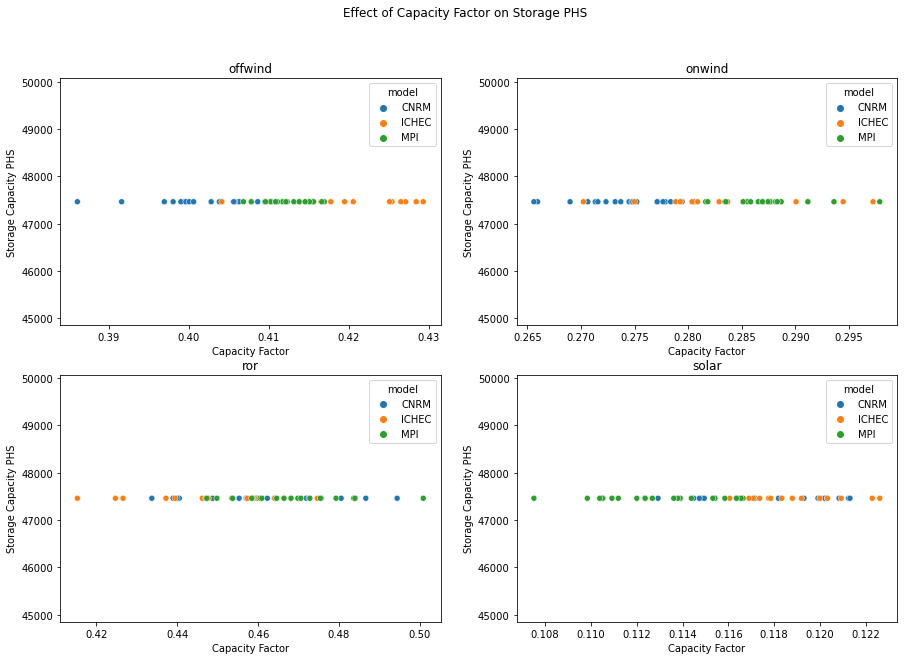

In [78]:
phs_pairings = pairings.loc[:,:,"PHS",:]
fig, axes = plt.subplots(2,2, figsize=(15,10))
fig.suptitle("Effect of Capacity Factor on Storage PHS")
axes_pointer = axes.flatten()
for i, carrier in enumerate(['offwind', 'onwind', 'ror', 'solar']):
    sns.scatterplot(data=phs_pairings.loc[:,:,carrier], 
                    x="capacity_factor", y="str_capacity", hue="model",
                    ax = axes_pointer[i], legend = True)
    axes_pointer[i].set_title(carrier)
    axes_pointer[i].set_xlabel("Capacity Factor")
    axes_pointer[i].set_ylabel("Storage Capacity PHS")

In [64]:
stg_all.index.levels[1]

Index(['H2', 'PHS', 'battery', 'hydro'], dtype='object', name='storage')

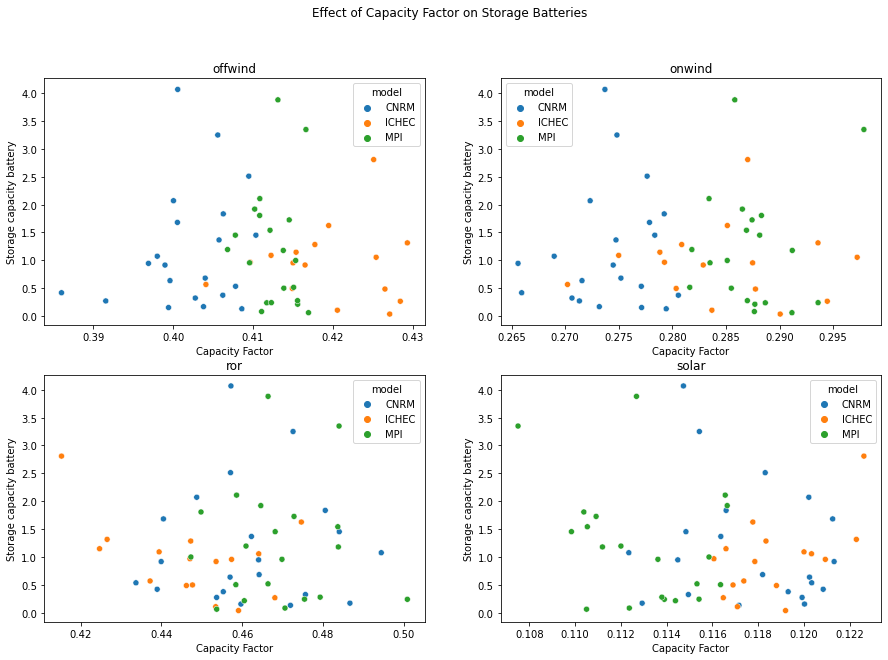

In [79]:
battery_pairings = pairings.loc[:,:,"battery",:]
fig, axes = plt.subplots(2,2, figsize=(15,10))
fig.suptitle("Effect of Capacity Factor on Storage Batteries")
axes_pointer = axes.flatten()
for i, carrier in enumerate(['offwind', 'onwind', 'ror', 'solar']):
    sns.scatterplot(data=battery_pairings.loc[:,:,carrier], 
                    x="capacity_factor", y="str_capacity", hue="model",
                    ax = axes_pointer[i], legend = True)
    axes_pointer[i].set_title(carrier)
    axes_pointer[i].set_xlabel("Capacity Factor")
    axes_pointer[i].set_ylabel("Storage capacity battery")

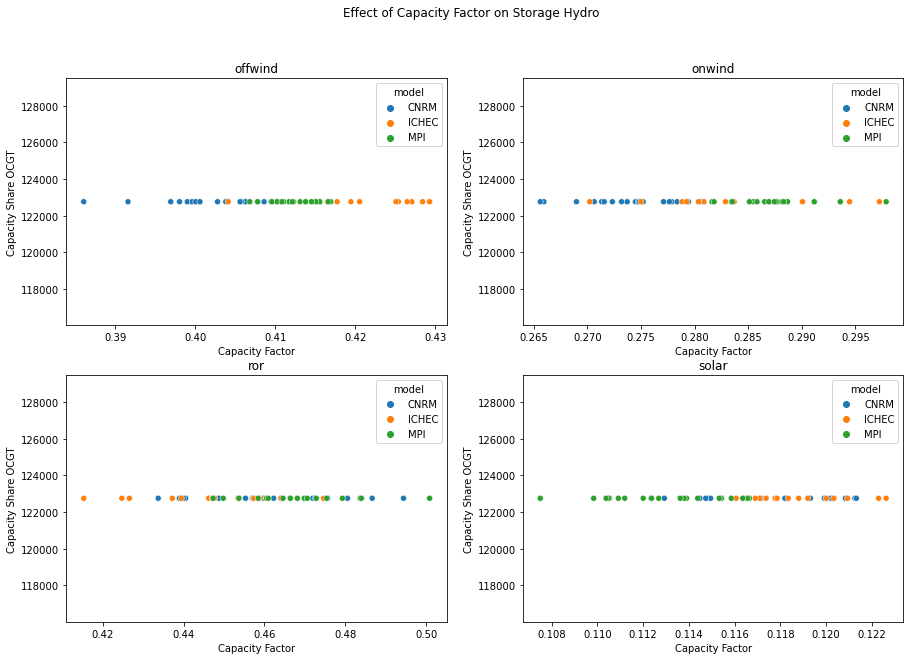

In [73]:
hydro_pairings = pairings.loc[:,:,"hydro",:]
fig, axes = plt.subplots(2,2, figsize=(15,10))
fig.suptitle("Effect of Capacity Factor on Storage Hydro")
axes_pointer = axes.flatten()
for i, carrier in enumerate(['offwind', 'onwind', 'ror', 'solar']):
    sns.scatterplot(data=hydro_pairings.loc[:,:,carrier], 
                    x="capacity_factor", y="str_capacity", hue="model",
                    ax = axes_pointer[i], legend = True)
    axes_pointer[i].set_title(carrier)
    axes_pointer[i].set_xlabel("Capacity Factor")
    axes_pointer[i].set_ylabel("Capacity Share OCGT")

<AxesSubplot:xlabel='storage', ylabel='str_capacity'>

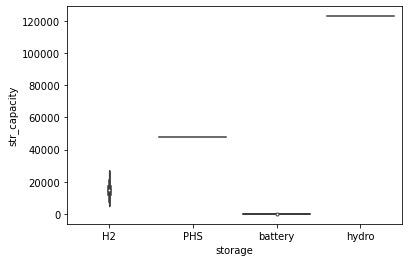

In [91]:
sns.violinplot(data =stg_all.reset_index(), x="storage", y = "str_capacity")